# p27: Solve KdV equation

Solve the KdV equation using FFT

$$
u_t + u u_x + u_{xxx} = 0, \qquad x \in [-\pi,\pi]
$$

In [31]:
%config InlineBackend.figure_format='svg'
from matplotlib.collections import LineCollection
from numpy import pi,cosh,exp,round,zeros,arange,real
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure

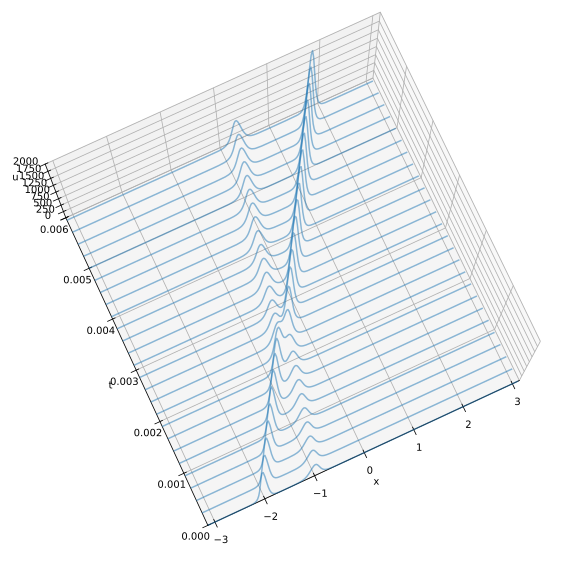

In [32]:
# Set up grid and differentiation matrix:
N = 256; dt = 0.4/N**2; x = (2*pi/N)*arange(-N/2,N/2);
A, B = 25.0, 16.0
u = 3*A**2/cosh(0.5*A*(x+2))**2 + 3*B**2/cosh(0.5*B*(x+1))**2
uhat = fft(u); 
k = zeros(N); k[0:N//2] = arange(0,N/2); k[N//2+1:] = arange(-N/2+1,0,1)
ik3 = 1j * k**3

def rhs(t,Uhat):
    uhat = exp(ik3 * t) * Uhat
    u = real(ifft(uhat))
    return -0.5j * k * exp(-ik3 * t) * fft(u**2)

# Time-stepping by Runge-Kutta
tmax = 0.006; nplt = int(round((tmax/25)/dt))
nmax = int(round(tmax/dt))
udata = []; udata.append(list(zip(x, u)))
tdata = [0.0]
for n in range(1,nmax+1):
    t = n*dt
    Uhat = uhat
    k1 = rhs(0, Uhat)
    k2 = rhs(dt/2, Uhat + 0.5 * dt * k1)
    k3 = rhs(dt/2, Uhat + 0.5 * dt * k2)
    k4 = rhs(dt,   Uhat +       dt * k3)
    Uhat = Uhat + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    uhat = exp(ik3 * dt) * Uhat
    if n%nplt == 0:
        u = real(ifft(uhat))
        udata.append(list(zip(x, u)))
        tdata.append(t);

fig = figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
poly = LineCollection(udata)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('x'); ax.set_ylabel('t'); ax.set_zlabel('u')
ax.set_xlim3d(-pi, pi); ax.set_ylim3d(0, tmax); ax.set_zlim3d(0, 2000)
ax.view_init(80,-115);

## Make animation

In [33]:
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib import rc
rc('animation', html='jshtml')

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-pi, pi), ylim=(0, 2000))
line, = ax.plot([], [], lw=2)
plt.xlabel('x'); plt.ylabel('u'); plt.close()

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x, u = zip(*udata[i])
    line.set_data(x, u)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, repeat=False,
                               frames=len(udata), interval=50, blit=True)
# Save to file
try:
    anim.save('p27.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
except:
    print("Cannot save mp4 file")

In [34]:
# Use this for inline display with controls
anim

In [35]:
# Use this for inline display of movie
#from IPython.display import HTML
#HTML(anim.to_html5_video())